# PPO + gSDE / A2C + gSDE / SAC + gSDE
In the first attempt to solve the reacher environment, the PPO, A2C, and SAC algorithms were used with the same architecture (optimized on PPO) and with a small learning rate tuning. The question is whether one can get a better performance by starting from tuned hyper parameters of a similar domain, in this case, `HalfCheetahBulletEnv-v0`. The hyper parameters were copied from the [baselines zoo](https://github.com/DLR-RM/rl-baselines3-zoo/). An interesting add on is the fact that gSDE is used in each case.

Practically in all cases considered there is a clear advantage starting from those parameters and can save quite a lot of tuning time. Additionally, this gives a better chance of starting with a stable algorithm on a new problem (the first iteration till the single agent PPO converged was pretty painful!). 

In [2]:
from pathlib import Path

from utils import plot_several_experiment_curves

## PPO + gSDE

In [3]:
experiments_ppo_stability = [
        ('run 1', '../experiments/zoo_ppo_gsde_norm_reward/tensorboard_logs/PPO_1'),
        ('run 2', '../experiments/zoo_ppo_gsde_norm_reward/tensorboard_logs/PPO_2'),
        ('run 3', '../experiments/zoo_ppo_gsde_norm_reward/tensorboard_logs/PPO_3')
]

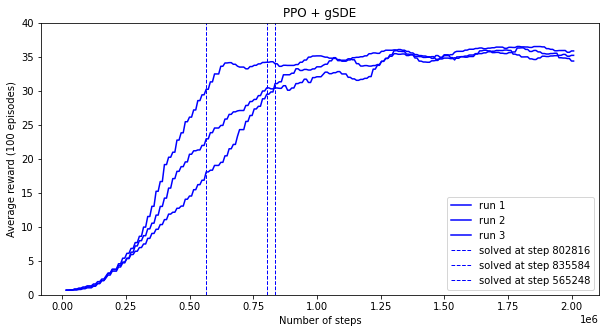

In [5]:
plot_several_experiment_curves(
    experiments_ppo_stability, 
    title='PPO + gSDE',
    save_name='ppo_zoo_sgde_norm_reward',
    colors=3*['blue'])

## A2C + gSDE

In [17]:
experiments_a2c_stability = [
    ('run 1',  '../experiments/zoo_a2c_gsde_norm/tensorboard_logs/A2C_1'),
    ('run 2',  '../experiments/zoo_a2c_gsde_norm/tensorboard_logs/A2C_2'),
    ('run 3',  '../experiments/zoo_a2c_gsde_norm/tensorboard_logs/A2C_3')
]

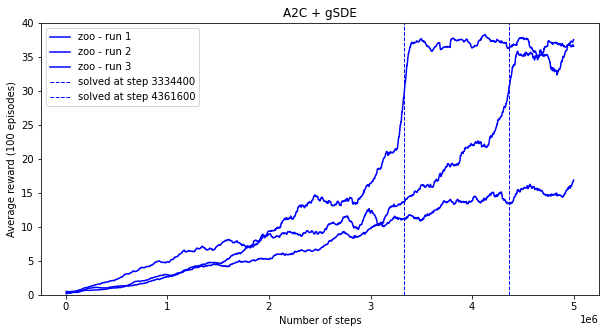

In [23]:
plot_several_experiment_curves(
    experiments_a2c_stability, 
    title='A2C + gSDE',
    save_name='a2c_zoo_sgde_norm',
    colors=3*['blue'])

## SAC + gSDE
SAC had not been tested before, but it was very easy to get the best results (in terms of number of steps till convergence) out of the box. One has to state though, that the algorithm started diverging a bit after a number of steps and early stopping needed to be applied in order to pick the best model.

In [24]:
experiments_sac_stability = [
    ('run 1', '../experiments/zoo_sac_gsde/tensorboard_logs/SAC_1'),
    ('run 2', '../experiments/zoo_sac_gsde/tensorboard_logs/SAC_2'),
    ('run 3', '../experiments/zoo_sac_gsde/tensorboard_logs/SAC_3'),
]

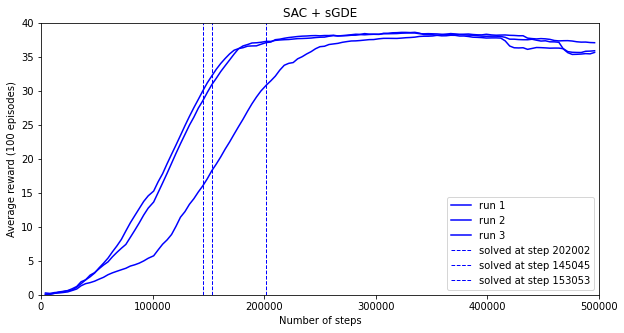

In [25]:
plot_several_experiment_curves(
    experiments_sac_stability, 
    title='SAC + sGDE',
    save_name='sac_zoo_sgde_norm',
    xlim=(0, 500000),
    colors=3*['blue'])